In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [162]:
fruits = pd.read_csv("E:/Python Programs/fruits.csv")
fruits.head()

,color,sphericity,weight,label
0,Orange,0.947,120,Orange
1,Orange,0.917,125,Orange
2,Orange,0.923,110,Orange
3,Orange,0.916,123,Orange
4,Orange,0.943,124,Orange


In [163]:
fruits_train, fruits_test = train_test_split(fruits, test_size=0.25)
fruits_train.shape, fruits_test.shape

((45, 4), (15, 4))

In [164]:
X_train, y_train = fruits_train[["sphericity", "weight"]], fruits_train["label"]
X_train.shape, y_train.shape

((45, 2), (45,))

In [165]:
X_test, y_test = fruits_test[["sphericity", "weight"]], fruits_test["label"]
X_test.shape, y_test.shape

((15, 2), (15,))

In [166]:
fruits[fruits.label=="Apple"]

,color,sphericity,weight,label
30,Green,0.717,154,Apple
31,Green,0.711,170,Apple
32,Green,0.714,164,Apple
33,Green,0.831,152,Apple
34,Green,0.721,172,Apple
35,Green,0.745,181,Apple
36,Green,0.775,173,Apple
37,Green,0.791,167,Apple
38,Green,0.733,184,Apple
39,Green,0.727,160,Apple


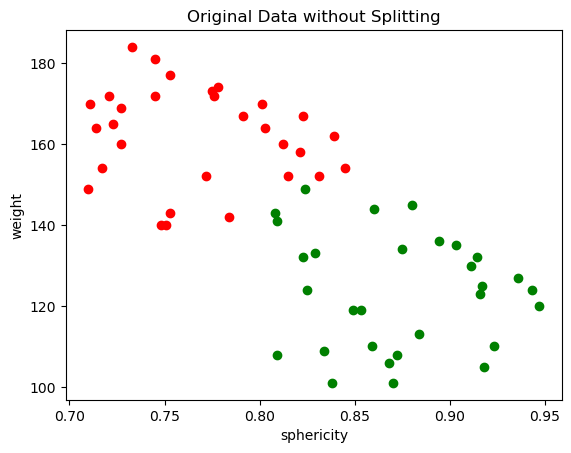

In [167]:
plt.scatter(x="sphericity", y="weight", data=fruits[fruits.label=="Apple"], c="red")
plt.scatter(x="sphericity", y="weight", data=fruits[fruits.label=="Orange"], c="green")
plt.title("Original Data without Splitting")
plt.xlabel("sphericity")
plt.ylabel("weight")
plt.show()

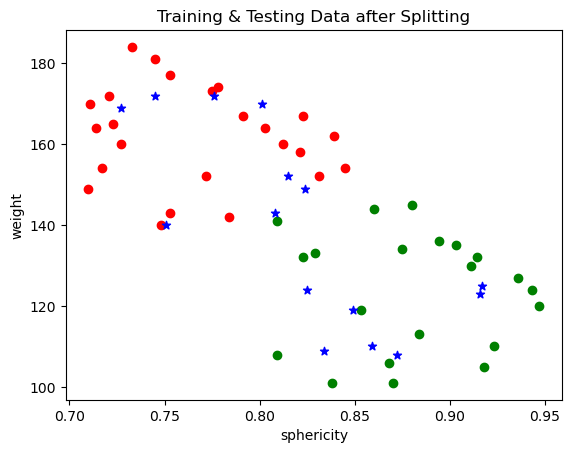

In [168]:
plt.scatter(x="sphericity", y="weight", data=fruits_train[y_train=="Apple"], c="red")
plt.scatter(x="sphericity", y="weight", data=fruits_train[y_train=="Orange"], c="green")
plt.scatter(x="sphericity", y="weight", data=fruits_test, marker="*", c="blue")
plt.title("Training & Testing Data after Splitting")
plt.xlabel("sphericity")
plt.ylabel("weight")
plt.show()

In [169]:
model=DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9333333333333333

In [170]:
y_predict = model.predict(X_test)
accuracy_score(y_test, y_predict)

0.9333333333333333

In [171]:
# Manually calculating the accuracy score

np.sum(y_test==y_predict)/len(y_test)

0.9333333333333333

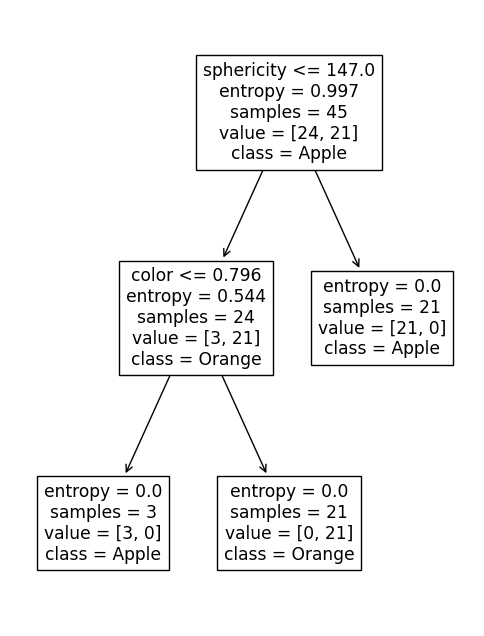

In [172]:
plt.figure(figsize=[6,8])
plot_tree(decision_tree=model, feature_names=fruits_train.columns, class_names=model.classes_)
plt.show()

In [173]:
model.get_depth(), model.get_n_leaves()

(2, 3)

In [174]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

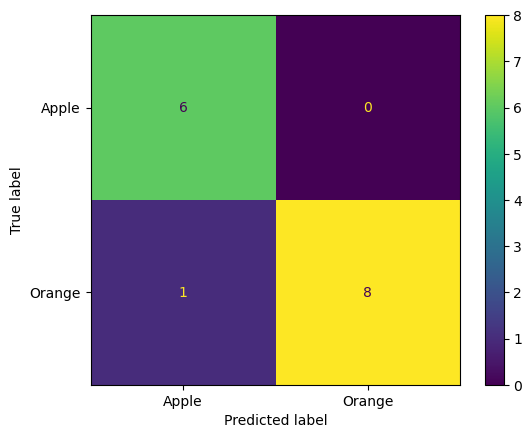

In [175]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.show()

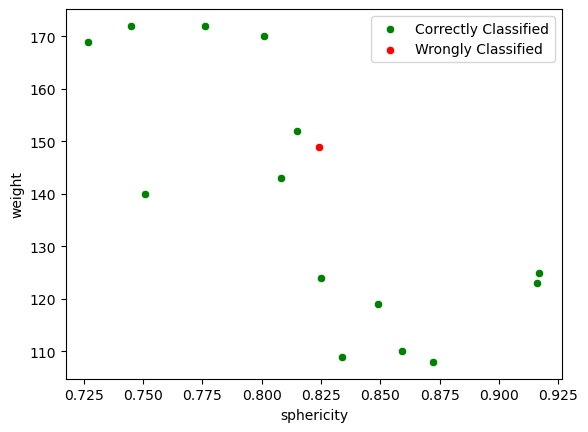

In [176]:
sns.scatterplot(data=fruits_test[y_test==y_predict], x="sphericity", y="weight", c="green", label="Correctly Classified")
sns.scatterplot(data=fruits_test[y_test!=y_predict], x="sphericity", y="weight", c="red", label="Wrongly Classified")
plt.xlabel("sphericity")
plt.ylabel("weight")
plt.legend()
plt.show()

In [178]:
(-(1/8)*np.log2(1/8)-(7/8)*np.log2(7/8))

0.5435644431995964

In [180]:
3/8*(-(0/3)*np.log2(0/3)-(3/3)*np.log2(3/3))

C:\Users\skong\AppData\Local\Temp\ipykernel_23464\3074218767.py:1: RuntimeWarning: divide by zero encountered in log2
  3/8*(-(0/3)*np.log2(0/3)-(3/3)*np.log2(3/3))
C:\Users\skong\AppData\Local\Temp\ipykernel_23464\3074218767.py:1: RuntimeWarning: invalid value encountered in scalar multiply
  3/8*(-(0/3)*np.log2(0/3)-(3/3)*np.log2(3/3))


nan

In [188]:
0.540-0.405

0.135

In [193]:
fruits.head()

,color,sphericity,weight,label
0,Orange,0.947,120,Orange
1,Orange,0.917,125,Orange
2,Orange,0.923,110,Orange
3,Orange,0.916,123,Orange
4,Orange,0.943,124,Orange
